In [1]:
import pandas

In [2]:
housing_data = pandas.read_csv('Housing.csv')

In [3]:
housing_data.head(10)

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no
5,6,66000,4160,3,1,1,yes,yes,yes,no,yes,0,no
6,7,66000,3880,3,2,2,yes,no,yes,no,no,2,no
7,8,69000,4160,3,1,3,yes,no,no,no,no,0,no
8,9,83800,4800,3,1,1,yes,yes,yes,no,no,0,no
9,10,88500,5500,3,2,4,yes,yes,no,no,yes,1,no


In [4]:
#Visualising the data 
import matplotlib.pyplot as plt
import numpy as np

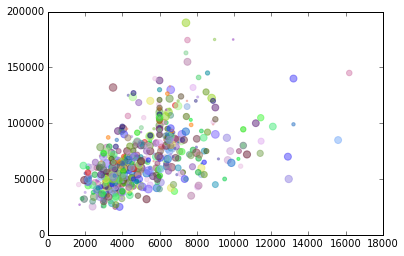

In [39]:
%matplotlib inline
N = 50
M = 4
color = np.random.rand(N,M)
area = np.pi * (20 * np.random.rand(N))
plt.scatter(housing_data['lotsize'], housing_data['price'], color=color , s=area, marker=u'o', alpha=0.5)

#Split test and train data

In [6]:
from sklearn.cross_validation import train_test_split
# random_state = 0 for same data always
train , test = train_test_split(housing_data, test_size=0.2, random_state = 0)
print train.head(10)
print test.head(10)
# One time thing to bring data in consistent form
# test.replace(to_replace='yes', value=1, inplace=True)
# train.replace(to_replace='yes', value=1, inplace=True)
# test.replace(to_replace='no', value=0, inplace=True)
# train.replace(to_replace='no', value=0, inplace=True)
# print train.head(10)
# print test.head(10)

     Unnamed: 0   price  lotsize  bedrooms  bathrms  stories driveway recroom  \
118         119  106500     4300         3        2        2      yes      no   
400         401   92500     7410         3        1        1      yes     yes   
543         544  103000     6000         3        2        4      yes     yes   
202         203   50000     3480         3        1        1       no      no   
165         166   62000     4075         3        1        1      yes     yes   
508         509   87000     8372         3        1        3      yes      no   
454         455   74900     6050         3        1        1      yes      no   
264         265   50000     3640         2        1        1      yes      no   
524         525  113000     6000         4        2        4      yes      no   
455         456   75000     3800         3        1        2      yes     yes   

    fullbase gashw airco  garagepl prefarea  
118      yes    no    no         1       no  
400      yes    

# Build the Regression model

In [7]:
from sklearn import linear_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

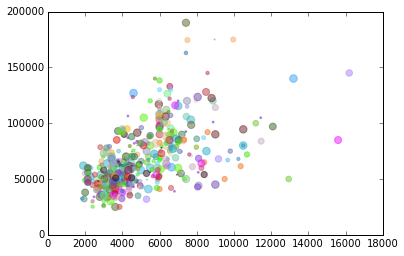

In [8]:
model = linear_model.LinearRegression()
train_x = train[['lotsize']]
plt.scatter(train['lotsize'], train['price'], color=color , s=area, marker=u'o', alpha=0.5)
train_y = train['price']
model.fit(train_x, train_y)
# print train.shape
# print train['price'].shape

#Evaluate model 

68347.7272727
352.202050209


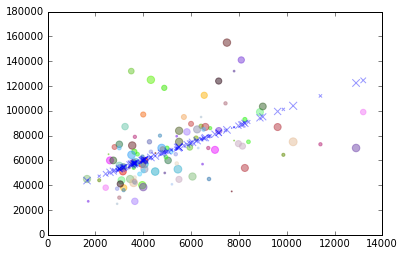

In [23]:
print test['price'].mean()
test_x = test[['lotsize']]
# print train
test_y = test['price']
plt.scatter(test['lotsize'], test['price'], color=color , s=area, marker=u'o', alpha=0.5)
plt.scatter(test['lotsize'], model.predict(test_x), color='blue' , s=area, marker=u'x', alpha=0.4)
print np.sqrt(np.mean(model.predict(test_x) - test_y)**2)

In [10]:
print model.coef_

[ 7.00022888]


In [22]:
from sklearn import linear_model
model_1 = linear_model.LinearRegression()
train_X = train[['bedrooms', 'bathrms', 'lotsize', 'stories', 'garagepl']]
print train_X.shape
train_y = train['price']
print train_y.shape
model_1.fit(train_X, train_y)
test_X = test[['bedrooms', 'bathrms', 'lotsize', 'stories', 'garagepl']]
test_y = test['price']
print np.sqrt(np.mean(model_1.predict(test_X) - test_y)**2)
# unique_values = [train[each].value_counts() for each in train_X.columns]
# print unique_values

(436, 5)
(436,)
1181.28743525


In [38]:
print test.head(5)
# print test.iloc[0]
train_X = train.iloc[0]
train_y = train_X['price']
train_X = train_X[['bedrooms', 'bathrms', 'lotsize', 'stories', 'garagepl']]
print train_X
print model_1.predict(train_X)
print train_y

train_X = train.iloc[0]
train_y = train_X['price']
train_X = train_X[['lotsize']]
print train_X
print model.predict(train_X)
print train_y

     Unnamed: 0   price  lotsize  bedrooms  bathrms  stories driveway recroom  \
85           86   57000     6480         3        1        2       no      no   
436         437  132000     7800         3        2        2      yes      no   
96           97   53900     8250         3        1        1      yes      no   
186         187   44700     5495         3        1        1      yes      no   
134         135   65000     3760         3        1        1      yes      no   

    fullbase gashw airco  garagepl prefarea  
85        no    no   yes         1       no  
436       no    no    no         0      yes  
96        no    no    no         2       no  
186      yes    no    no         0       no  
134       no    no    no         2       no  
bedrooms       3
bathrms        2
lotsize     4300
stories        2
garagepl       1
Name: 118, dtype: object
[ 78077.30482787]
106500.0
lotsize    4300
Name: 118, dtype: object
[ 62240.49994719]
106500.0
